In [11]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [24]:
# Load the run history data and fix coltypes:
df = pd.read_pickle('runHist.pkl')
colTypes = {'qV': float, 'reward': float,'alpha':float, 'deadline':int}
for c in colTypes:
    df[c] = df[c].apply(lambda x: colTypes[c](x)) 

# Create some reporting features
df['Error'] = df['reward'].apply(lambda x: 1 if x < 0 else 0)


In [13]:
df[df['trip']==99]

,trip,light,oncoming,left,right,next_waypoint,action,qA,qV,reward,alpha,deadline,Explored
99001,99,green,None,None,None,forward,forward,forward,0.20409,2,0.2,25,False
99002,99,red,None,None,None,forward,None,None,0.102041,1,0.2,24,False
99003,99,red,None,None,None,forward,None,None,0.102041,1,0.2,23,False
99004,99,red,None,None,None,forward,None,None,0.102041,1,0.2,22,False
99005,99,red,None,None,None,forward,None,None,0.102041,1,0.2,21,False
99006,99,green,None,None,None,forward,forward,forward,0.204082,2,0.2,20,False
99007,99,green,None,None,None,forward,forward,forward,0.204082,2,0.2,19,False
99008,99,red,None,None,None,left,None,None,0.102041,1,0.2,18,False
99009,99,red,None,None,None,left,None,None,0.102041,1,0.2,17,False
99010,99,green,None,None,None,left,left,left,0.20409,2,0.2,16,False


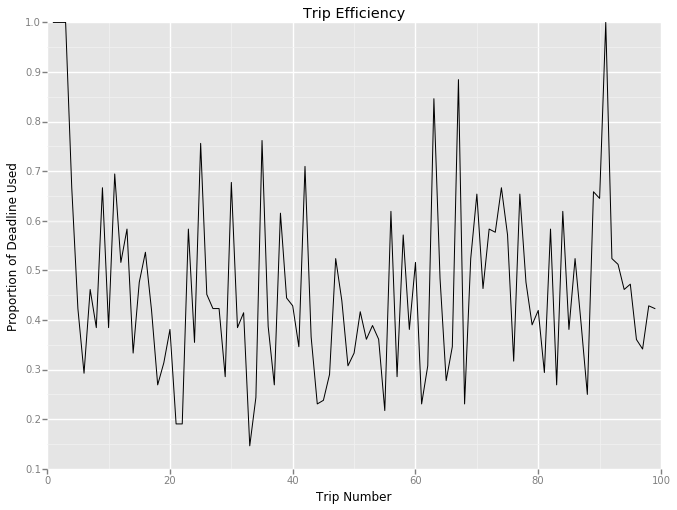

<ggplot: (33734095)>

In [37]:
temp = df.groupby(['trip']).agg({'deadline':'max','light':'count'})
temp['deadline']+=1
temp['UtilizedMoves'] = temp['light']/temp['deadline']
temp = temp.reset_index()
temp
ggplot(temp, aes(x='trip',y='UtilizedMoves')) + geom_line() + ggtitle('Trip Efficiency') + xlab('Trip Number') + ylab('Proportion of Deadline Used')

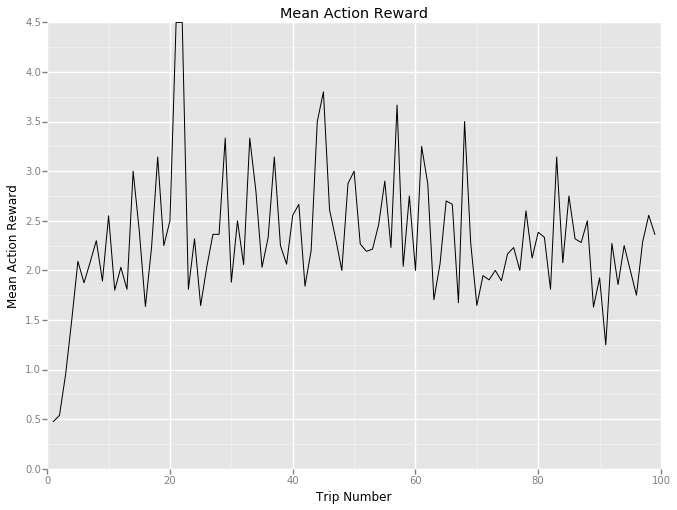

<ggplot: (34322608)>

In [38]:
tempq = df.groupby(['trip'])['reward'].mean().reset_index()
ggplot(tempq, aes(x='trip', y='reward')) + geom_line() + ggtitle('Mean Action Reward') + xlab('Trip Number') + ylab('Mean Action Reward')

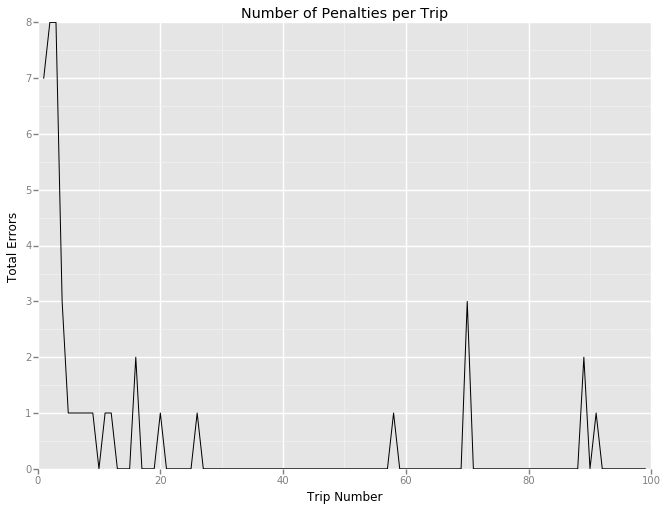

<ggplot: (36239332)>

In [36]:
tempq = df.groupby(['trip'])['Error'].sum().reset_index()
ggplot(tempq, aes(x='trip', y='Error')) + geom_line() + ggtitle('Number of Penalties per Trip') + xlab('Trip Number') + ylab('Total Errors')
